In [49]:
import os
import cv2
import glob
import tqdm
import time
import random
import pytesseract
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
random.seed(42)

In [51]:
pytesseract.pytesseract.tesseract_cmd = r"/usr/local/Cellar/tesseract/5.3.4_1/bin/tesseract"

# cabBills Yo !

In [52]:
imgFiles = glob.glob("clsData/cabBills/*.png")
imgFiles

['clsData/cabBills/cabBills_12.png',
 'clsData/cabBills/cabBills_2.png',
 'clsData/cabBills/cabBills_3.png',
 'clsData/cabBills/cabBills_13.png',
 'clsData/cabBills/cabBills_39.png',
 'clsData/cabBills/cabBills_11.png',
 'clsData/cabBills/cabBills_1.png',
 'clsData/cabBills/cabBills_0.png',
 'clsData/cabBills/cabBills_10.png',
 'clsData/cabBills/cabBills_38.png',
 'clsData/cabBills/cabBills_14.png',
 'clsData/cabBills/cabBills_28.png',
 'clsData/cabBills/cabBills_4.png',
 'clsData/cabBills/cabBills_5.png',
 'clsData/cabBills/cabBills_29.png',
 'clsData/cabBills/cabBills_15.png',
 'clsData/cabBills/cabBills_17.png',
 'clsData/cabBills/cabBills_7.png',
 'clsData/cabBills/cabBills_6.png',
 'clsData/cabBills/cabBills_16.png',
 'clsData/cabBills/cabBills_59.png',
 'clsData/cabBills/cabBills_65.png',
 'clsData/cabBills/cabBills_64.png',
 'clsData/cabBills/cabBills_58.png',
 'clsData/cabBills/cabBills_66.png',
 'clsData/cabBills/cabBills_67.png',
 'clsData/cabBills/cabBills_63.png',
 'clsData

In [53]:
imgName = imgFiles[1]
imgName

'clsData/cabBills/cabBills_2.png'

In [54]:
img = cv2.imread(imgName, 0)
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245],
       [245, 245, 245, ..., 245, 245, 245]], dtype=uint8)

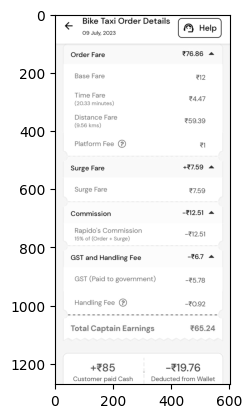

In [55]:
plt.imshow(img, cmap = "grey")

In [56]:
txtOut = pytesseract.image_to_string(img)
txtOut

"Bike Taxi Order Details\n\n09 July, 2023\n\nOrder Fare 376.86 a\nBase Fare 2\nTime Fare 24.47\n(20.33 minutes)\n\nDistance Fare 259,39\n(9.56 kms)\nPlatform Fee @) al\n\nSurge Fare +2759 &\nSurge Fare 27.59\n\nCommission -712.51 =\nRapido'’s Commission 21251\n15% of (Order + Surge)\n\nGST and Handling Fee 67\nGST (Paid to government) -25.78\nHandling Fee @) -20.92\n\nTotal Captain Earnings 265.24\n\n+785 ; -%19.76\n\nCustomer paid Cash Deducted from Wallet\n"

In [57]:
ocrList = []
for i in tqdm.tqdm(imgFiles, colour = 'red'):
    img = cv2.imread(i, 0)
    txtOut = pytesseract.image_to_string(img)
    ocrList.append(txtOut)

  0%|          | 0/68 [00:00<?, ?it/s]

100%|██████████| 68/68 [00:52<00:00,  1.30it/s]


In [58]:
ocrList = list(set(ocrList)-{''})
random.shuffle(ocrList)
len(ocrList)

62

In [59]:
dataList = []
for i in tqdm.tqdm(ocrList, colour = 'blue'):
    time.sleep(0.05)
    dataList.append([i, 'Travel Category - Cab Bill/Receipt'])

100%|██████████| 62/62 [00:03<00:00, 18.44it/s]


In [60]:
dataArray = np.array(dataList)
dataArray

array([['156869707\n\n° TOTAL FARE\n\nse Pal\n\nTOTAL DISTANCE: 3.65 km\nTOTAL RIDE TIME ; 21.25 min\n\n: 0 121\n\nFARE BREAKUP TAX BREAKUP\nMinimum Bill 339.0 Service Tax 6.42\nRate after base fare: 243.47 Swachh Bharat cess 20.23\nFree ride time (0 min) 0.0 (Taxes added to your total fare)\nRi hi f\nide time charge for 21.25 431 9g\nmin\nTotal tax 36.65\nBOOKING DETAILS\nService type Ranchi, Cab, Sedan\nBooking Date 07 Dec, 2015, 08:41 pm\nPickup Date 07 Dec, 2015, 08:50 pm\n\nBooking Email id bhanus@hotmail.com\n\nsiting time during the trip.\n\nm bill of 39 Ride time at 21.5 per min , inc\n\nclu additional service t\n\nis applicable on your fare. Tot\n\ns are extra\ncing\nmplai it our Support page\n\n7 Jectronicaly generated invoice and doe quire signature. Allterms and condtions are as gv\n\nwhen the demar at we can make more cabs available\n\nefficiently\n\nSANT Technologies Pvt. Ltd\n\n',
        'Travel Category - Cab Bill/Receipt'],
       ['bon 165)\nsans\nporta\nras (0)\n\n+

In [61]:
df = pd.DataFrame(dataArray, columns = ['OCR Contents', 'Category'])
df

,OCR Contents,Category
0,156869707\n\n° TOTAL FARE\n\nse Pal\n\nTOTAL D...,Travel Category - Cab Bill/Receipt
1,bon 165)\nsans\nporta\nras (0)\n\n+ Categores\...,Travel Category - Cab Bill/Receipt
2,"GD, Auto- Bajaj-RE\n\n(DP) %235 17.2km = ~— 35...",Travel Category - Cab Bill/Receipt
3,OLAR uy\n\n“Thanks forusing Olacabs\n\nTOTAL F...,Travel Category - Cab Bill/Receipt
4,TOTAL FARE\n\n7468\n\n‘TOTAL DISTANCE: 21.19 k...,Travel Category - Cab Bill/Receipt
...,...,...
57,“4 86% 10:34\n\nGg &@ :\n\nBill Details\n\nBas...,Travel Category - Cab Bill/Receipt
58,OLA uA morce no:\n\nOLA gaurav daga\n\n2s\n\nT...,Travel Category - Cab Bill/Receipt
59,e Airtel 3G 11:27 AM 71%\n\nDone OlaCabs206945...,Travel Category - Cab Bill/Receipt
60,TaxiReceipt : Pre-Paid Taxi Services TaxiRecei...,Travel Category - Cab Bill/Receipt


In [62]:
df.describe()

,OCR Contents,Category
count,62,62
unique,62,1
top,156869707\n\n° TOTAL FARE\n\nse Pal\n\nTOTAL D...,Travel Category - Cab Bill/Receipt
freq,1,62


In [63]:
if not os.path.isdir("jsonStuff"):
    os.makedirs("jsonStuff")

In [64]:
jsonData = df.to_json('jsonStuff/cabBills.json')
jsonData

# busTickets Yo !

In [66]:
imgFiles = glob.glob("clsData/busTickets/*.png")
imgFiles

['clsData/busTickets/busTickets_103.png',
 'clsData/busTickets/busTickets_117.png',
 'clsData/busTickets/busTickets_15.png',
 'clsData/busTickets/busTickets_29.png',
 'clsData/busTickets/busTickets_28.png',
 'clsData/busTickets/busTickets_14.png',
 'clsData/busTickets/busTickets_116.png',
 'clsData/busTickets/busTickets_102.png',
 'clsData/busTickets/busTickets_114.png',
 'clsData/busTickets/busTickets_100.png',
 'clsData/busTickets/busTickets_128.png',
 'clsData/busTickets/busTickets_16.png',
 'clsData/busTickets/busTickets_17.png',
 'clsData/busTickets/busTickets_129.png',
 'clsData/busTickets/busTickets_101.png',
 'clsData/busTickets/busTickets_115.png',
 'clsData/busTickets/busTickets_139.png',
 'clsData/busTickets/busTickets_111.png',
 'clsData/busTickets/busTickets_105.png',
 'clsData/busTickets/busTickets_13.png',
 'clsData/busTickets/busTickets_12.png',
 'clsData/busTickets/busTickets_104.png',
 'clsData/busTickets/busTickets_110.png',
 'clsData/busTickets/busTickets_138.png',


In [67]:
imgName = imgFiles[1]
imgName

'clsData/busTickets/busTickets_117.png'

In [68]:
img = cv2.imread(imgName, 0)
img

array([[255, 255, 253, ..., 253, 252, 255],
       [255, 254, 253, ..., 209, 255, 254],
       [253, 255, 255, ...,  58, 231, 252],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

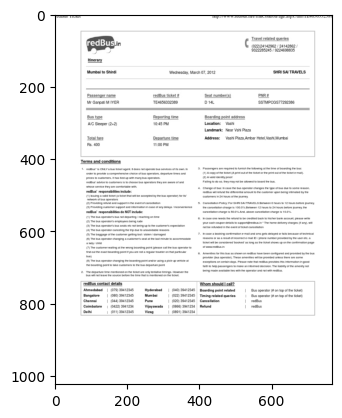

In [69]:
plt.imshow(img, cmap = "grey")

In [70]:
txtOut = pytesseract.image_to_string(img)
txtOut

"redBus Ticket\n\n‘hitp://www.redbus.in/PrintControlPage.aspx?tin=TE4656332389\n\ndB Travel related queries\nedbusi) (022)24142060 ) 24142862 /\n= Seezeesans eens\n\ntinerary\nMunbal to Shira Wednesday, March 07,2012 SHRI SAI TRAVELS\nPassenger name redBus ticket # Seat number(s) puns\nMe Garpat IYER Te4686392969 or SSTMPOGS77252506\nus type Reporting tine Boarding point address\nNC Sleeper (242) 1045 PM\n\nDeparture time\n\n14900 Pat\n\n‘Terms and conditions.\n\n‘ronre potas scomproteree chee ots sprain orp te a\npce caterer ae Soup wh marybus per:\n\n‘ea ceo comer chou Du operas wey ana tant\nreds reaponsbties include\n\n(pasug ata tent (cet at be accepted yet peg rs\nrenner tou per\n\n@yproaig etre ard epee eet otcareeton\n\n(2) Prwcing antes spoon aerator inca of ary Se nearerence\nredBus responsBlies do NOT include:\n\n(0) eb operators et pang eachng on re\n\n(2) te busoperaorsempuyes beg nae\n\n(2) We bis operators sso rat beig op We eatomers xpectaton\n(4) We us opera caneng te 

In [71]:
ocrList = []
for i in tqdm.tqdm(imgFiles, colour = 'red'):
    img = cv2.imread(i, 0)
    txtOut = pytesseract.image_to_string(img)
    ocrList.append(txtOut)

100%|██████████| 247/247 [08:22<00:00,  2.03s/it]


In [72]:
ocrList = list(set(ocrList)-{''})
random.shuffle(ocrList)
len(ocrList)

234

In [73]:
dataList = []
for i in tqdm.tqdm(ocrList, colour = 'blue'):
    time.sleep(0.05)
    dataList.append([i, 'Travel Category - Bus Ticket'])

100%|██████████| 234/234 [00:12<00:00, 18.38it/s]


In [74]:
dataArray = np.array(dataList)
dataArray

array([['‘reen018\n\nANDHRA PRADESH STATE ROAD TRANSPORT CORPORATION\nRTC House, Pandit Nehru Bus Station, Vijayawada - 520006, Andhra Pradesh, India.\n\nTelephone ogs6 2570005\n\nNo.\neMail: online. support@apsttcontine.in\nWeb hitpiwwwapsrteoniine.in\n\nGSTIN — : 37AAGFA3527J22F\n\nOnward Journey Ticket Details\n\ne-TICKET ADVANCE RESERVATION\n\nTicket No 95002721 UID Number 5593,\nService CodeIName —24244/ RGIA - RZL Service Category INDRA\n\nFrom HYD-AIRPORT-RGIA-PICKUP POINT-D To PALAKOLLU\n\nPickup Point HYD-AIRPORT-RGIA-PICKUP POINT.D Date of Journey 31-Jan-2019\n\nPickup Address. RGIA "D" PICKUP POINT 9704274193 Depart On 31-Jan-2019 10:00\n\nNo. of Seats. 4( Adults:1 Children:0) Arrival On 31-Jan-2019 19:45\n\nPlatform No. : Start Time at Origin 34-Jan-201910:00Hrs\n\n08 Ref. No. 3035157927 Bank Name ces\n\nOriginal Basic Fare (*) 628.00 Concession Amount () 0\n\nBasie Fare (+) 628 ResewvationFee(*) 30\n\nService Fee (+) 19 Toll Fee (+) 32\n\nDinner Amount (+) 0\n\nLevy Amount

In [75]:
df = pd.DataFrame(dataArray, columns = ['OCR Contents', 'Category'])
df

,OCR Contents,Category
0,‘reen018\n\nANDHRA PRADESH STATE ROAD TRANSPOR...,Travel Category - Bus Ticket
1,‘hitps://rsttconline rajasthan gov inticket_bo...,Travel Category - Bus Ticket
2,redBuskg\n\nD}\nDelhi to Dehradun\n\n‘Wednesda...,Travel Category - Bus Ticket
3,redBusky\n\n‘Travel related queries\n\n(033) 2...,Travel Category - Bus Ticket
4,s+ PSCQ62841762 NR No> ITRAS2A10\n\nThank y [N...,Travel Category - Bus Ticket
...,...,...
229,JTTARAKHAND TRA}\n\nU.P.S.R.T.C\nNAJIBABAD\n\n...,Travel Category - Bus Ticket
230,116°’ f ind fF gies wee ll oe ll 57%\n\nKSRTC ...,Travel Category - Bus Ticket
231,Print eTicket\n\nJourney Date & Time : 06-Mar-...,Travel Category - Bus Ticket
232,‘https://www.upsrtconline.co.in/ticket_booking...,Travel Category - Bus Ticket


In [76]:
df.describe()

,OCR Contents,Category
count,234,234
unique,234,1
top,‘reen018\n\nANDHRA PRADESH STATE ROAD TRANSPOR...,Travel Category - Bus Ticket
freq,1,234


In [77]:
if not os.path.isdir("jsonStuff"):
    os.makedirs("jsonStuff")

In [78]:
jsonData = df.to_json('jsonStuff/busTickets.json')
jsonData